# Exploratory Data Analysis

Due the characterstics of the data in this EDA we'll plot the data using different techinques such as plotting in time domain or in frequency domain.

### Libraries

In [46]:
!pip install gwpy
import gwpy
from gwpy.timeseries import TimeSeries

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
     |████████████████████████████████| 51 kB 5.9 MB/s 
     |████████████████████████████████| 11.2 MB 41.5 MB/s 
     |████████████████████████████████| 4.1 MB 46.0 MB/s 
     |████████████████████████████████| 950 kB 44.1 MB/s 
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp37-cp37m-linux_x86_64.whl size=86662 sha256=3b67baf76be55ae93c5e0f94094592ffd2667e9a2d3cdc7db830f74c197675ab
  Stored in directory: /root/.cache/pip/wheels/09/f9/d4/129b3bb4458d50b56fdc8245ace7c8216d54865fe8d3aebc05
Successfully built ligo-segments
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("display.max_colwidth", None) # setting the maximum width in characters when displaying pandas column. "None" value means unlimited.

import matplotlib.pyplot as plt  # plotting
from glob import glob     # pathname management

import seaborn as sns
from scipy.interpolate import interp1d  # interpolating a 1-D function
import matplotlib.mlab as mlab  # some MATLAB commands

import librosa
import librosa.display

In [4]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files

In [6]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andresallkaggle","key":"8cb73434f502a3acc94c5aa40523b96b"}'}

In [7]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c g2net-gravitational-wave-detection

100% 69.0G/69.0G [09:07<00:00, 193MB/s]
100% 69.0G/69.0G [09:07<00:00, 135MB/s]


In [11]:
!mkdir tfm_g2n

In [12]:
!unzip g2net-gravitational-wave-detection.zip -d tfm_g2n

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: tfm_g2n/train/f/d/b/fdb14b7377.npy  
  inflating: tfm_g2n/train/f/d/b/fdb168823b.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1719211.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1a48774.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1d4f709.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1dc62a0.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1e85265.npy  
  inflating: tfm_g2n/train/f/d/b/fdb1f724dc.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2661a8e.npy  
  inflating: tfm_g2n/train/f/d/b/fdb27e9e38.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2817b6c.npy  
  inflating: tfm_g2n/train/f/d/b/fdb28781fb.npy  
  inflating: tfm_g2n/train/f/d/b/fdb28e9c17.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2a10846.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2a52f69.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2a700e4.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2ccc0a8.npy  
  inflating: tfm_g2n/train/f/d/b/fdb2e6e8c0.npy  
  inflating: tfm_g2n/train/f/d/b/fdb317

### Setup variables

In [13]:
from google.colab import drive
drive.mount("/content/tfm_g2n")

ValueError: ignored

In [14]:
training_labels = pd.read_csv("/content/tfm_g2n/training_labels.csv")
training_labels.head()

,id,target
0,00000e74ad,1
1,00001f4945,0
2,0000661522,0
3,00007a006a,0
4,0000a38978,1


To make things easier let's merge the path of the file into the df with the target

With glob we can get all the files in the train directory

In [15]:
training_paths = glob("/content/tfm_g2n/train/*/*/*/*")
print("The total number of files in the training set:", len(training_paths))

The total number of files in the training set: 560000


In [16]:
training_paths

['/content/tfm_g2n/train/2/2/2/2225c3c8bb.npy',
 '/content/tfm_g2n/train/2/2/2/22270b114b.npy',
 '/content/tfm_g2n/train/2/2/2/2225bb8ad2.npy',
 '/content/tfm_g2n/train/2/2/2/2221100e18.npy',
 '/content/tfm_g2n/train/2/2/2/2222a33551.npy',
 '/content/tfm_g2n/train/2/2/2/222e73cfeb.npy',
 '/content/tfm_g2n/train/2/2/2/2227d6708e.npy',
 '/content/tfm_g2n/train/2/2/2/2229f0bec3.npy',
 '/content/tfm_g2n/train/2/2/2/22210723a5.npy',
 '/content/tfm_g2n/train/2/2/2/22217838d6.npy',
 '/content/tfm_g2n/train/2/2/2/222591d8ed.npy',
 '/content/tfm_g2n/train/2/2/2/22279d7fac.npy',
 '/content/tfm_g2n/train/2/2/2/222210e8c5.npy',
 '/content/tfm_g2n/train/2/2/2/2224a51c5c.npy',
 '/content/tfm_g2n/train/2/2/2/222a77cf31.npy',
 '/content/tfm_g2n/train/2/2/2/222bf0b923.npy',
 '/content/tfm_g2n/train/2/2/2/222aecea81.npy',
 '/content/tfm_g2n/train/2/2/2/22240d7e0b.npy',
 '/content/tfm_g2n/train/2/2/2/222eb6bb05.npy',
 '/content/tfm_g2n/train/2/2/2/222d32cef4.npy',
 '/content/tfm_g2n/train/2/2/2/222b80520

In [17]:
ids = [path.split("/")[-1].split(".")[0] for path in training_paths]
paths_df = pd.DataFrame({"path":training_paths, "id": ids})
train_data = pd.merge(left=training_labels, right=paths_df, on="id")
train_data.head()

,id,target,path
0,00000e74ad,1,/content/tfm_g2n/train/0/0/0/00000e74ad.npy
1,00001f4945,0,/content/tfm_g2n/train/0/0/0/00001f4945.npy
2,0000661522,0,/content/tfm_g2n/train/0/0/0/0000661522.npy
3,00007a006a,0,/content/tfm_g2n/train/0/0/0/00007a006a.npy
4,0000a38978,1,/content/tfm_g2n/train/0/0/0/0000a38978.npy


In [18]:
train_data.to_csv("/content/tfm_g2n/data_path.csv")

## Plots

Let's check if the source data target is balanced

In [19]:
train_data['target'].value_counts()

0    280070
1    279930
Name: target, dtype: int64

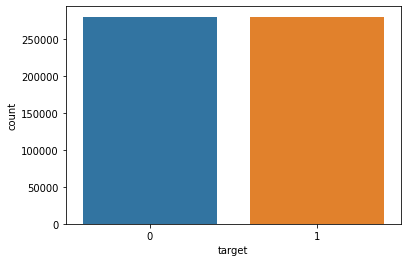

In [20]:
sns.countplot(data=train_data, x="target")

As we can see the source data is balanced.

Let's plot the signals

In [39]:
def plot_raw_data(path,
           df,
           target,
           labels = ('LIGO Hanford', 'LIGO Livingston', 'Virgo')
):
    _id = df[df['target'] == target].sample(random_state=42)['id'].values[0]
    sample_id = df[df['target'] == target].sample(random_state=42).index[0]
    training_files = glob(path[sample_id])
    data = np.load(training_files[0])
    fig, ax = plt.subplots(3,1,figsize=(12,10), sharey= True) 
    for i in range(3):
        
        plt.suptitle(f"Strain data for three observatories from sample: {_id} | Target: {target}")
        sns.lineplot(data=data[i], ax=ax[i], color=sns.color_palette()[i])
        ax[i].legend([labels[i]])
        ax[i].set_xlim(0, 4096)
        ax[i].set_xticks(ticks=[0, 2048, 4096])
        ax[i].set_xticklabels(labels=[0, 1, 2])
   

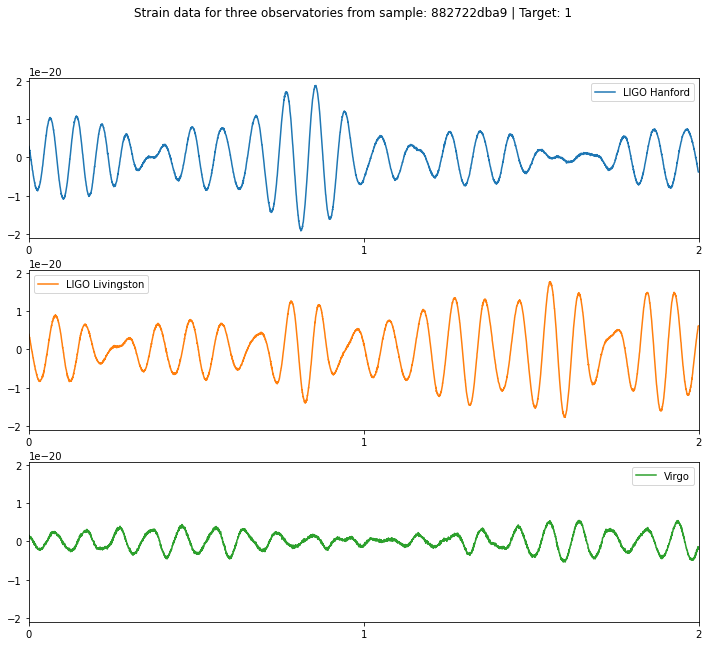

In [40]:
# plot the sample with gravitational wave signal
plot_raw_data(training_paths,train_data,1)

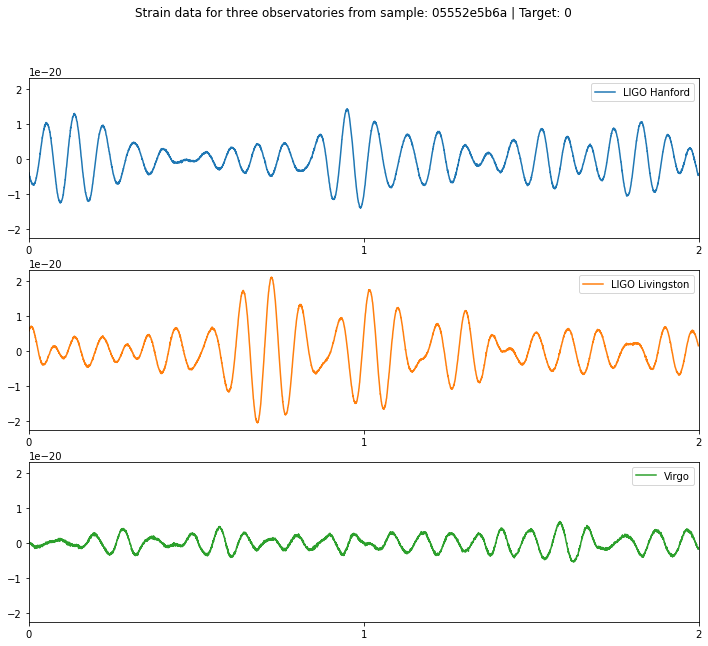

In [41]:
# plot the sample without gravitational wave signal
plot_raw_data(training_paths,train_data,0)

Descibir que se ve royo :

The three plots above show the strain values sampled for 2s at 2048 Hz for id 882722dba9. Out of the three readings, the two LIGO values are similar in amplitude while the Virgo is smaller. Even though this particular sample has gravitaional wave signal, it is burried deep in the instrument noise.


Similarly, for the sample 05552e5b6a without gravitational wave signal, we cannot visually see any signs. The strain is of the order , which is extremely small and can be affected by many external factors. However, as seen in both the sample plots, the strain data is a combination of many frequencies and analysing the signals in frequency domain, instead of the time domain, might give us better insights.

A Fourier Transform is the most commonly used method in maths and signal processing, to decompose the signals into its constituent discrete frequencies. This spectrum of frequencies can be analyzed based on average, power or energy of the signal to get a spectral density plot. We will follow some of the concepts from this tutorial. As it says, one of the ways to visualize a raw signal in frequency domain is by plotting the amplitude spectral density (ASD).

### Spectral density plots

In [48]:
# let's define some signal parameters
sample_rate = 2048 # data is provided at 2048 Hz
signal_length = 2 # each signal lasts 2 s
NFFT = 4*sample_rate    # the Nyquist frequency -
f_min = 20.
f_max = sample_rate/2

In [42]:
# function to plot the amplitude spectral density (ASD) plot
def plot_asd(path,
             df,
             target,
             signal_length,
             sample_rate,
             labels = ('LIGO Hanford', 'LIGO Livingston', 'Virgo')
):
    _id = df[df['target'] == target].sample(random_state=42)['id'].values[0]
    sample_id = df[df['target'] == target].sample(random_state=42).index[0]
    training_files = glob(path[sample_id])
    data = np.load(training_files[0])

    for i in range(data.shape[0]):
        
        ts = TimeSeries(data[i], sample_rate=sample_rate)
        ax = ts.asd(signal_length).plot(figsize=(12, 5)).gca()
        ax.set_xlim(10, 1024);
        ax.set_title(f"ASD plots for sample: {_id} from {labels[i]}")
        

In [55]:
def plot_asd_mix(path,
                 df,
                 target,
                 sample_rate,
                 NFFT,
                 f_min,
                 f_max,
                 labels = ('LIGO Hanford', 'LIGO Livingston', 'Virgo')):
    
    _id = df[df['target'] == target].sample(random_state=42)['id'].values[0]
    sample_id = df[df['target'] == target].sample(random_state=42).index[0]
    training_files = glob(path[sample_id])
    data = np.load(training_files[0])
    
   
    Pxx_1, freqs = mlab.psd(data[0], Fs = sample_rate, NFFT = NFFT)
    Pxx_2, freqs = mlab.psd(data[1], Fs = sample_rate, NFFT = NFFT)
    Pxx_3, freqs = mlab.psd(data[2], Fs = sample_rate, NFFT = NFFT)

    psd_1 = interp1d(freqs, Pxx_1)
    psd_2 = interp1d(freqs, Pxx_2)
    psd_3 = interp1d(freqs, Pxx_3)

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 5))
    ax.loglog(freqs, np.sqrt(Pxx_1),"g",label=labels[0])
    ax.loglog(freqs, np.sqrt(Pxx_2),"r",label=labels[1])
    ax.loglog(freqs, np.sqrt(Pxx_3),"b",label=labels[2])

    ax.set_xlim([f_min, f_max])
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Hz^-1/2")
    ax.set_title(f"ASD plots for sample: {_id}");
    ax.legend()

    plt.show()

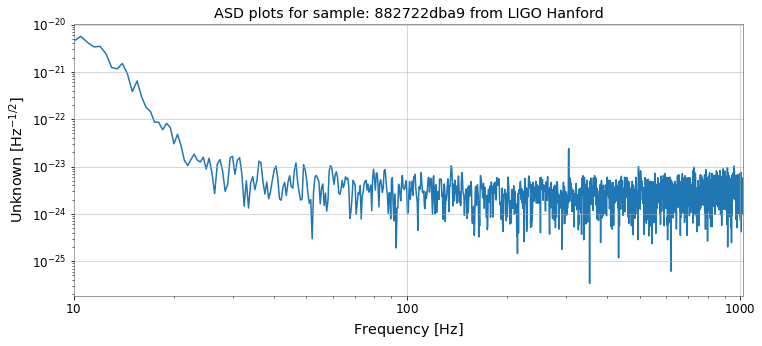

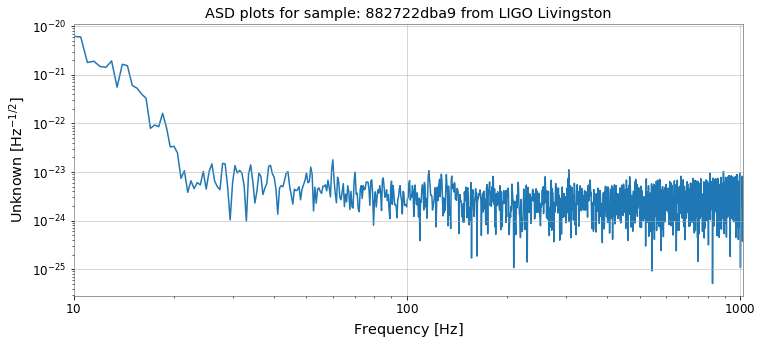

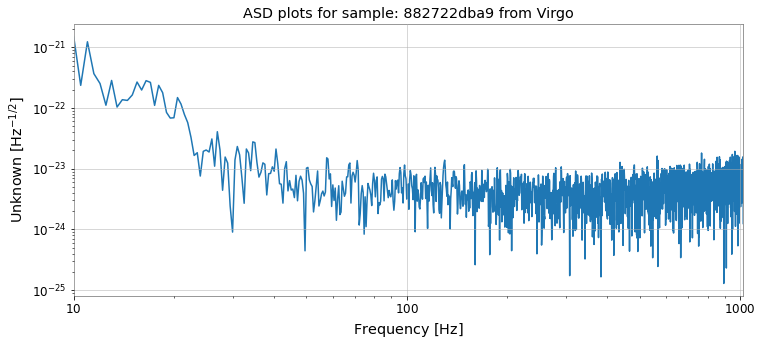

In [47]:
# plot ASD for sample w/ GW
plot_asd(training_paths, train_data,1, signal_length, sample_rate)

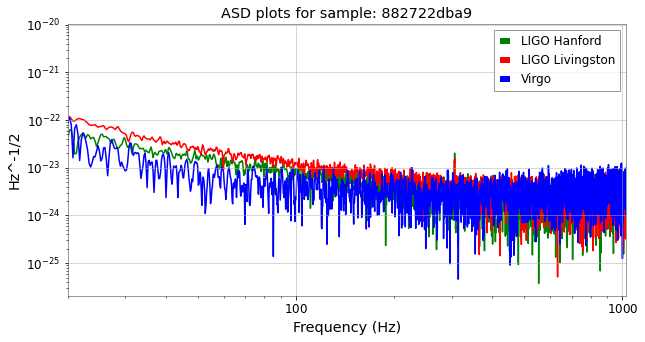

In [56]:
plot_asd_mix(training_paths, train_data,1, sample_rate, NFFT,f_min,f_max,)

These plots are plotted on a log scale for x-axis, and we see that it ranges from 10 Hz ~ 1000 Hz. Although, these limits are for visualization purposes only, it helps us see some peaks for each observatory. A particular frequency can be peculiar in one measurement but remember that the GW signal has to be detected in all three waves to be confirmed. This data here still seems a bit noisy and as showed in the tutorial, if sampled for longer periods of time (on real data), it can give some valuable insights. However, the data in this competition is simulated and we try to find other ways to visualize it.

Just for the sake of completeness, we also plot the spectral density plots for a sample without GW.

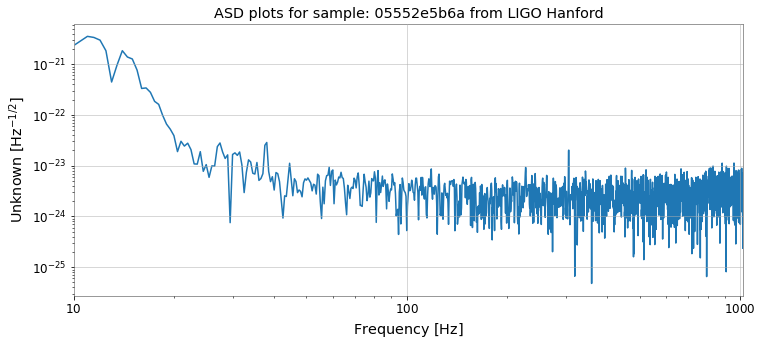

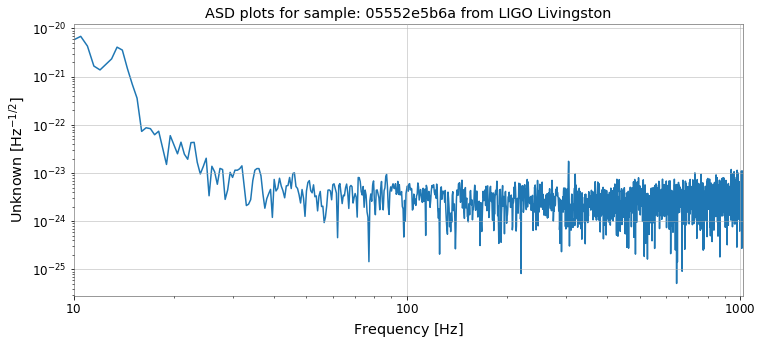

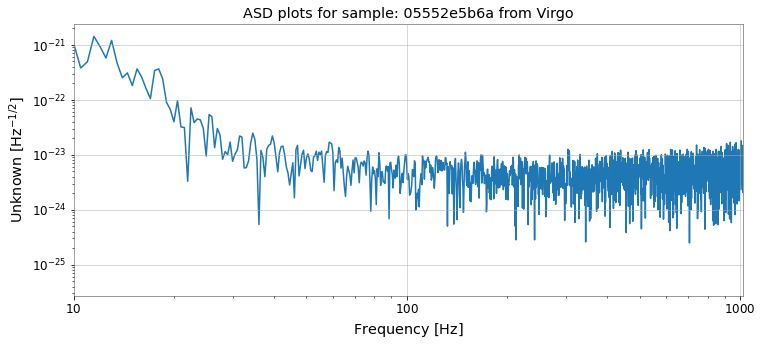

In [52]:
# plot ASD for sample w/o GW
plot_asd(training_paths, train_data,0, signal_length, sample_rate)

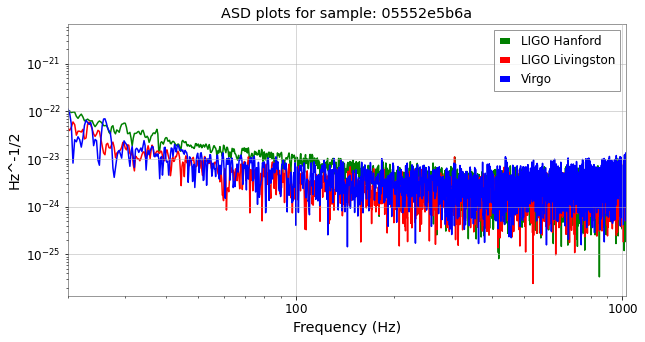

In [57]:
plot_asd_mix(training_paths, train_data,0, sample_rate, NFFT,f_min,f_max,)

They do seem to have fewer peaks, specially around 200 Hz, but there is so much variability in this data, that it can be concluded with certainty.

In [85]:
# function to plot the Q-transform spectrogram side-by-side
def plot_distribution(path,
                      df,
                      sample_rate,
                      signal_names,
                      labels=("LIGO Hanford", "LIGO Livingston", "Virgo")
                        ):
    plt.figure(figsize=(30,14))
    # Get the data
    _id_1 = df[df['target'] == 1].sample(random_state=42)['id'].values[0]
    sample_id_1 = df[df['target'] == 1].sample(random_state=42).index[0]
    training_files_1 = glob(path[sample_id_1])
    data_1 = np.load(training_files_1[0])

    _id_0 = df[df['target'] == 0].sample(random_state=42)['id'].values[0]
    sample_id_0 = df[df['target'] == 0].sample(random_state=42).index[0]
    training_files_0 = glob(path[sample_id_0])
    data_0 = np.load(training_files_0[0])

    k = 1
    for i in range(3):
        plt.subplot(2, 3, k)
        sns.distplot(data_1[i]*10**(20), label = labels[i])
        plt.legend()
        plt.title(f"Distribution plots for sample: {_id_1} from {labels[i]}. Target: 1")
        k+=1
    
    
    for i in range(3):
        plt.subplot(2, 3, k)
        sns.distplot(data_0[i]*10**(20), label = labels[i], color = 'r')
        plt.title(f"Distribution plots for sample: {_id_0} from {labels[i]}. Target: 0")
        plt.legend()
        k+=1

    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

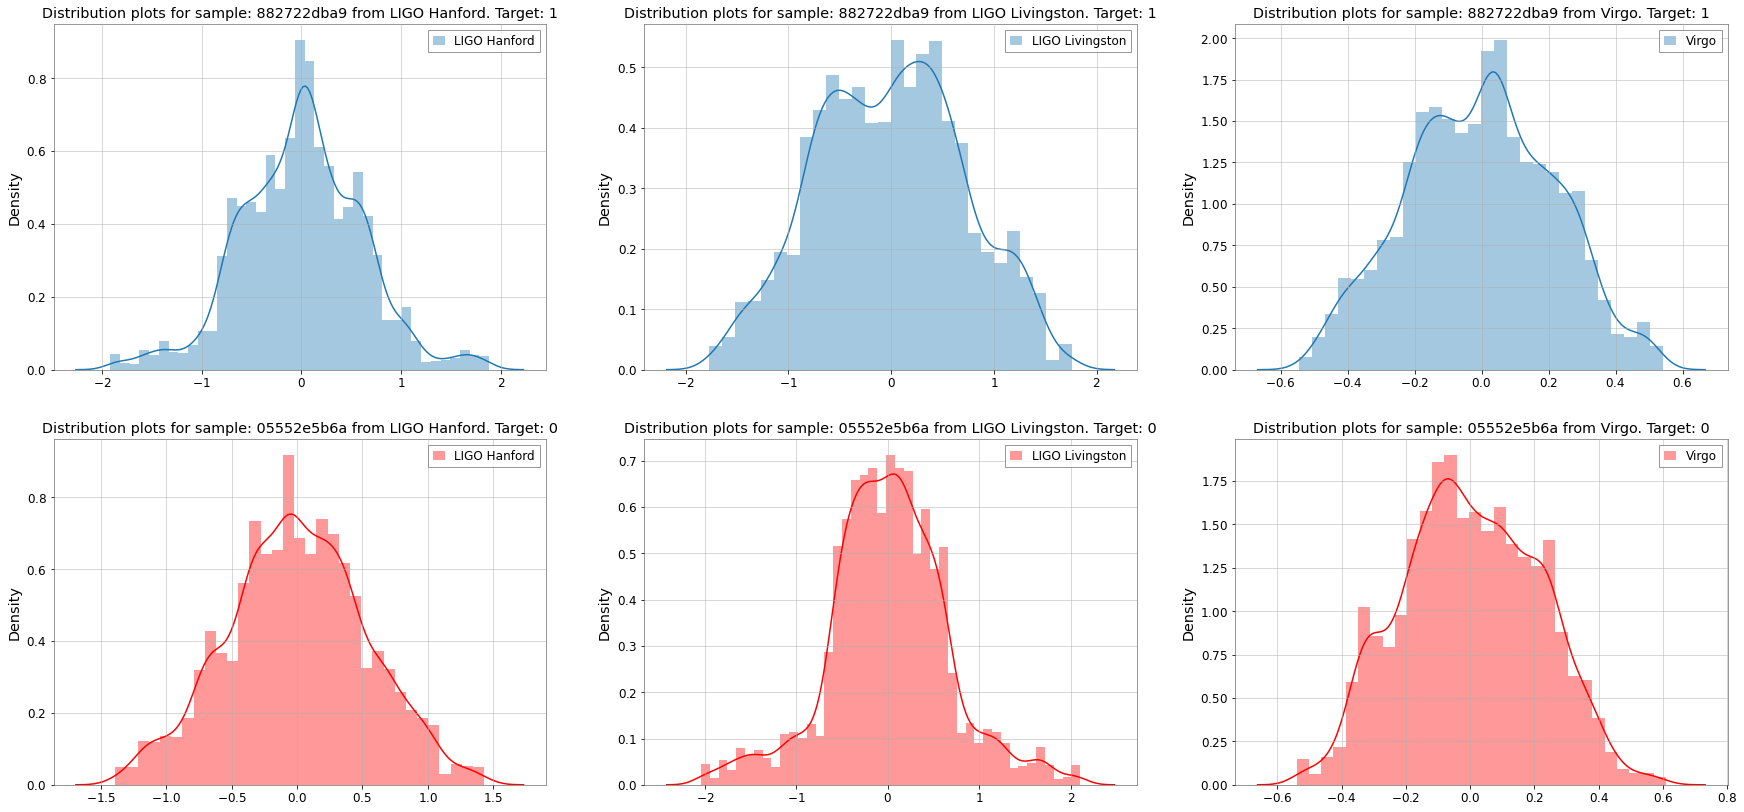

In [86]:
plot_distribution(training_paths, train_data, signal_length, sample_rate)